In [93]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np 

btc_data = pd.read_csv('../filtered_data/btc_hr_filtered.csv')
btc_data

,ID,Date,Price (GBP),Market Cap (GBP),Total Volume,% 24hr Change,% 7d Change,Class
0,1,2023-05-12 19:00:43,21148.935156,4.097681e+11,1.510790e+10,0.00,0.00,stay the same
1,2,2023-05-12 20:00:14,21261.908429,4.069436e+11,1.617397e+10,0.53,0.00,increase
2,3,2023-05-12 21:00:24,21262.735145,4.111276e+11,1.654765e+10,0.00,0.00,increase
3,4,2023-05-12 22:00:11,21503.989449,4.160784e+11,1.707627e+10,1.13,0.00,increase
4,5,2023-05-12 23:01:09,21456.695661,4.158526e+11,1.424874e+10,-0.22,0.00,decrease
...,...,...,...,...,...,...,...,...
2157,2158,2023-08-10 15:00:21,23140.513388,4.487786e+11,9.967789e+09,-0.26,0.19,decrease
2158,2159,2023-08-10 16:00:01,23154.882360,4.501985e+11,1.068622e+10,0.06,0.11,increase
2159,2160,2023-08-10 17:00:58,23134.536283,4.501955e+11,1.037784e+10,-0.09,0.12,decrease
2160,2161,2023-08-10 18:00:56,23180.262059,4.509031e+11,1.000547e+10,0.20,0.28,increase


In [94]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a target label column named 'target' in your DataFrame
label_encoder = LabelEncoder()
btc_data['Class'] = label_encoder.fit_transform(btc_data['Class'])

# Get the mapping between the encoded labels and the original classes
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Print the mapping
for encoded_label, original_class in label_mapping.items():
    print(f"Encoded Label: {encoded_label} --> Original Class: {original_class}")
    
btc_data

Encoded Label: 0 --> Original Class: decrease
Encoded Label: 1 --> Original Class: increase
Encoded Label: 2 --> Original Class: stay the same


,ID,Date,Price (GBP),Market Cap (GBP),Total Volume,% 24hr Change,% 7d Change,Class
0,1,2023-05-12 19:00:43,21148.935156,4.097681e+11,1.510790e+10,0.00,0.00,2
1,2,2023-05-12 20:00:14,21261.908429,4.069436e+11,1.617397e+10,0.53,0.00,1
2,3,2023-05-12 21:00:24,21262.735145,4.111276e+11,1.654765e+10,0.00,0.00,1
3,4,2023-05-12 22:00:11,21503.989449,4.160784e+11,1.707627e+10,1.13,0.00,1
4,5,2023-05-12 23:01:09,21456.695661,4.158526e+11,1.424874e+10,-0.22,0.00,0
...,...,...,...,...,...,...,...,...
2157,2158,2023-08-10 15:00:21,23140.513388,4.487786e+11,9.967789e+09,-0.26,0.19,0
2158,2159,2023-08-10 16:00:01,23154.882360,4.501985e+11,1.068622e+10,0.06,0.11,1
2159,2160,2023-08-10 17:00:58,23134.536283,4.501955e+11,1.037784e+10,-0.09,0.12,0
2160,2161,2023-08-10 18:00:56,23180.262059,4.509031e+11,1.000547e+10,0.20,0.28,1


In [95]:
selected_columns= btc_data.iloc[:, [2, 3, 4, 5, 6, 7]]

# Split the data into features (X) and target label (y)
X= selected_columns.iloc[:, :-1]  # Features (columns 2, 3, 4)
y= selected_columns.iloc[:, -1]   # Target label (column 7)# Standardize the data

In [96]:
selected_columns

,Price (GBP),Market Cap (GBP),Total Volume,% 24hr Change,% 7d Change,Class
0,21148.935156,4.097681e+11,1.510790e+10,0.00,0.00,2
1,21261.908429,4.069436e+11,1.617397e+10,0.53,0.00,1
2,21262.735145,4.111276e+11,1.654765e+10,0.00,0.00,1
3,21503.989449,4.160784e+11,1.707627e+10,1.13,0.00,1
4,21456.695661,4.158526e+11,1.424874e+10,-0.22,0.00,0
...,...,...,...,...,...,...
2157,23140.513388,4.487786e+11,9.967789e+09,-0.26,0.19,0
2158,23154.882360,4.501985e+11,1.068622e+10,0.06,0.11,1
2159,23134.536283,4.501955e+11,1.037784e+10,-0.09,0.12,0
2160,23180.262059,4.509031e+11,1.000547e+10,0.20,0.28,1


In [97]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [98]:
#ANN MODEL
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [101]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Create a simple MLPClassifier (ANN) model
model = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.4f}".format(accuracy))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))

Accuracy: 0.9723
Precision: 0.9731
Recall: 0.9723
F1-score: 0.9723


/Users/miguelremedios/opt/anaconda3/envs/thesis/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


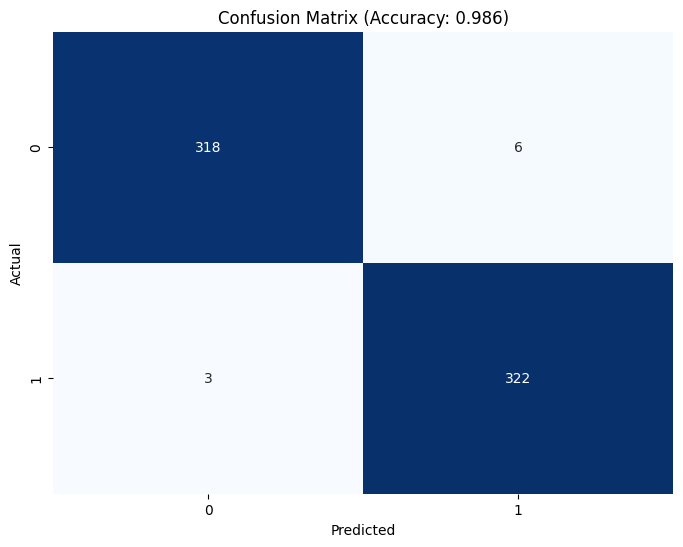

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming you have predicted labels stored in y_pred and true labels stored in y_test

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()